# <font style="color:black">Morphological Operations</font>

Lession objectives:
* Look at the effects of kernel shape on Erosion and Dilation
* Opening and Closing operation
* Morph gradient
* TopHat/BlackHat


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

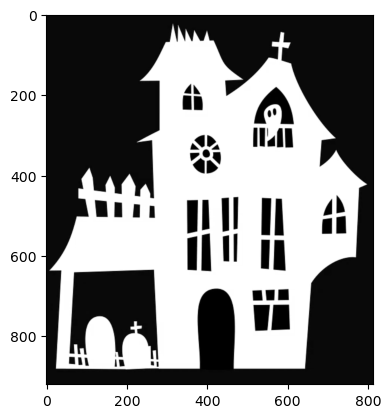

In [10]:
house_img = cv2.imread(os.path.relpath('../../Data/ShadowHouse.png'), cv2.IMREAD_GRAYSCALE)

# keep in mind black =0, white = 255, so our image is actually inverted
house_img = np.abs(255-house_img)

plt.imshow(house_img,cmap="gray")

Erosion and Dilation

Text(0.5, 1.0, 'Dilated')

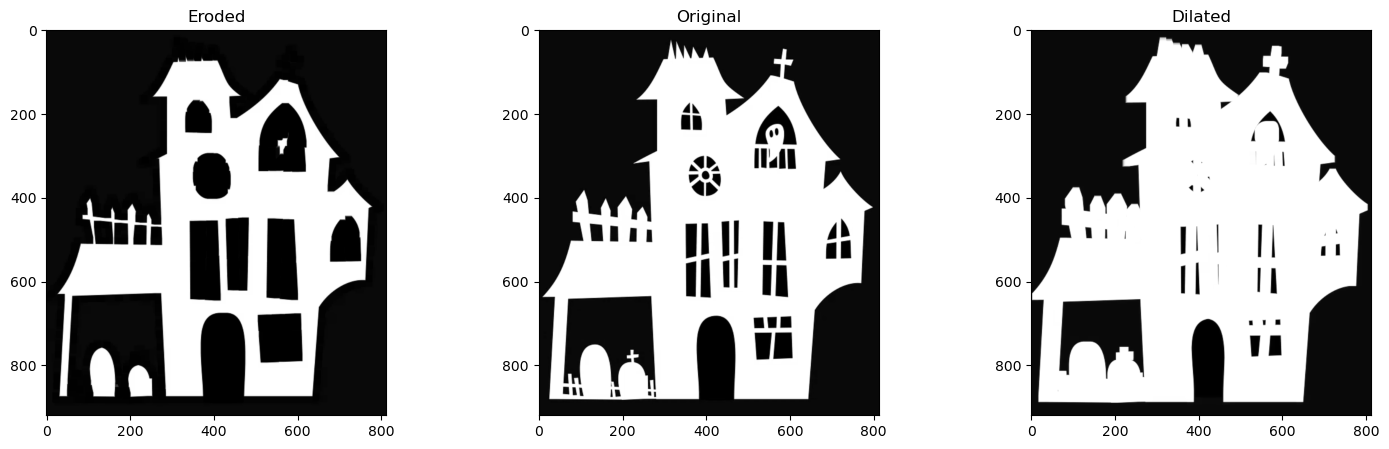

In [12]:
# First let's make a simple kernel of <15x15> 
kernel = np.ones((15,15),np.uint8)
im_eroded = cv2.erode(house_img,kernel)
im_dilated = cv2.dilate(house_img,kernel)


# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(131);plt.imshow(im_eroded, cmap="gray");  plt.title("Eroded")
plt.subplot(132);plt.imshow(house_img, cmap="gray");plt.title("Original")
plt.subplot(133);plt.imshow(im_dilated, cmap="gray");plt.title("Dilated")

Text(0.5, 1.0, 'Eroded horizontal')

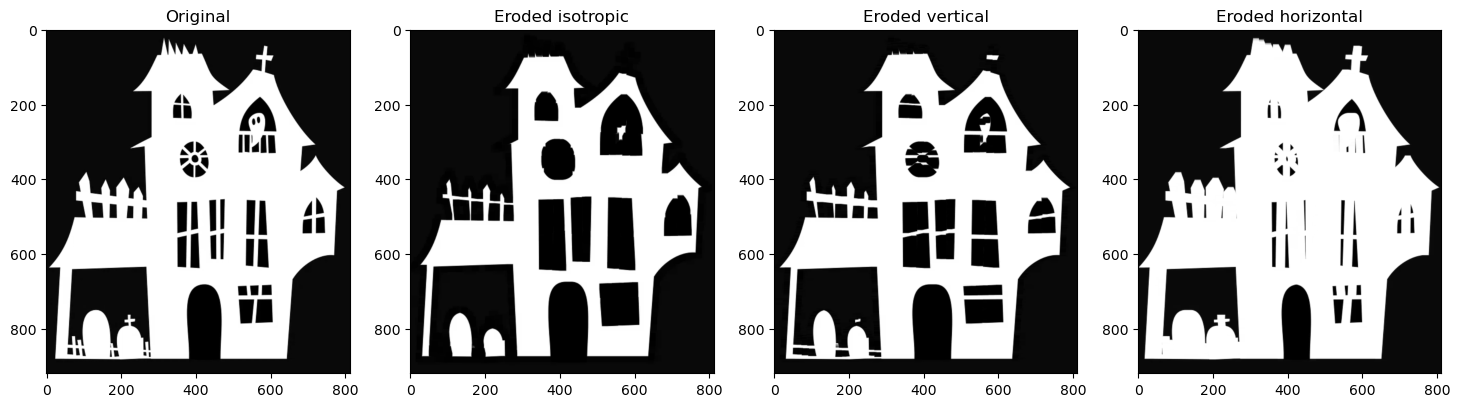

In [18]:
# First let's try with different kernel shaps
kernel_vert = np.zeros((15,15),np.uint8)
kernel_vert[7,:]=1

kernel_horz = np.zeros((15,15),np.uint8)
kernel_horz[7,:]=1


im_eroded_vert = cv2.erode(house_img,kernel_vert)
im_eroded_horz = cv2.dilate(house_img,kernel_horz)


# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(141);plt.imshow(house_img, cmap="gray");  plt.title("Original")
plt.subplot(142);plt.imshow(im_eroded, cmap="gray");  plt.title("Eroded isotropic")
plt.subplot(143);plt.imshow(im_eroded_vert, cmap="gray");plt.title("Eroded vertical")
plt.subplot(144);plt.imshow(im_eroded_horz, cmap="gray");plt.title("Eroded horizontal")

Opening and Closing operation

Opening is basically erosion followed by dilation.  
Closing is dilation followed by erosion

Text(0.5, 1.0, 'Closed 25 iteration')

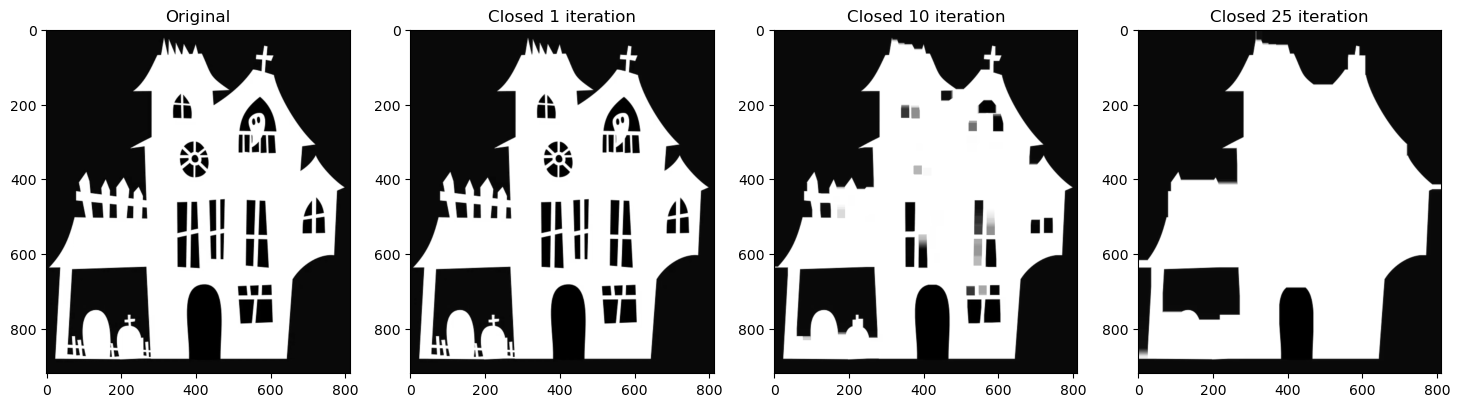

In [25]:
kernel = np.ones((3,3),np.uint8)

house_closed_1 = cv2.morphologyEx(house_img,cv2.MORPH_CLOSE,kernel,iterations=1)
house_closed_10 = cv2.morphologyEx(house_img,cv2.MORPH_CLOSE,kernel,iterations=10)
house_closed_25 = cv2.morphologyEx(house_img,cv2.MORPH_CLOSE,kernel,iterations=25)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(141);plt.imshow(house_img, cmap="gray");  plt.title("Original")
plt.subplot(142);plt.imshow(house_closed_1, cmap="gray");  plt.title("Closed 1 iteration")
plt.subplot(143);plt.imshow(house_closed_10, cmap="gray");plt.title("Closed 10 iterations")
plt.subplot(144);plt.imshow(house_closed_25, cmap="gray");plt.title("Closed 25 iterations")

Text(0.5, 1.0, 'Opened 25 iteration')

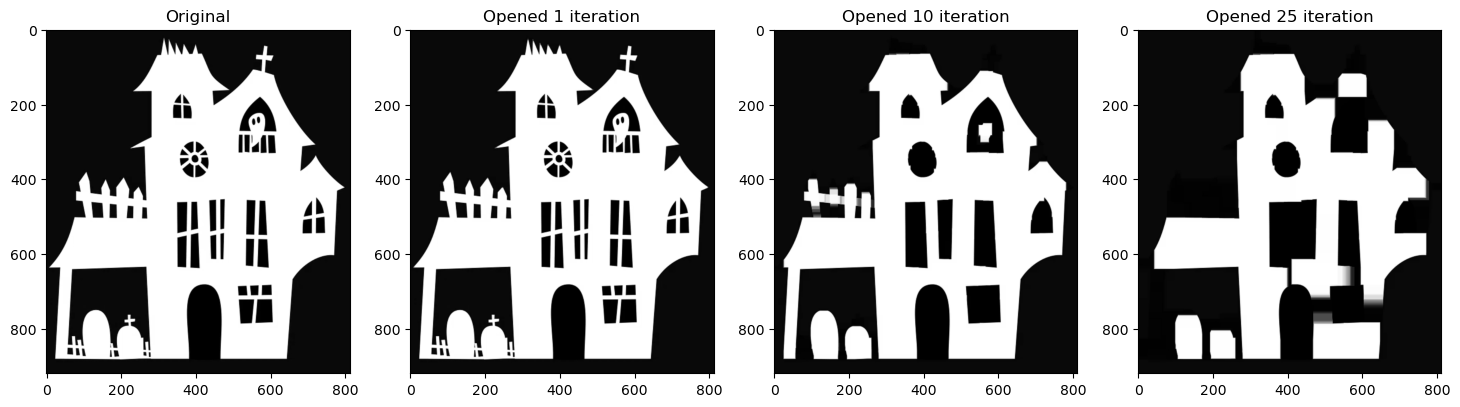

In [26]:
kernel = np.ones((3,3),np.uint8)

house_open_1 = cv2.morphologyEx(house_img,cv2.MORPH_OPEN,kernel,iterations=1)
house_open_10 = cv2.morphologyEx(house_img,cv2.MORPH_OPEN,kernel,iterations=10)
house_open_25 = cv2.morphologyEx(house_img,cv2.MORPH_OPEN,kernel,iterations=25)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(141);plt.imshow(house_img, cmap="gray");  plt.title("Original")
plt.subplot(142);plt.imshow(house_open_1, cmap="gray");  plt.title("Opened 1 iteration")
plt.subplot(143);plt.imshow(house_open_10, cmap="gray");plt.title("Opened 10 iterations")
plt.subplot(144);plt.imshow(house_open_25, cmap="gray");plt.title("Opened 25 iterations")

Morphological Gradient

This operation takes the difference between the eroded and dilated image.

Text(0.5, 1.0, 'Grad 25 iterations')

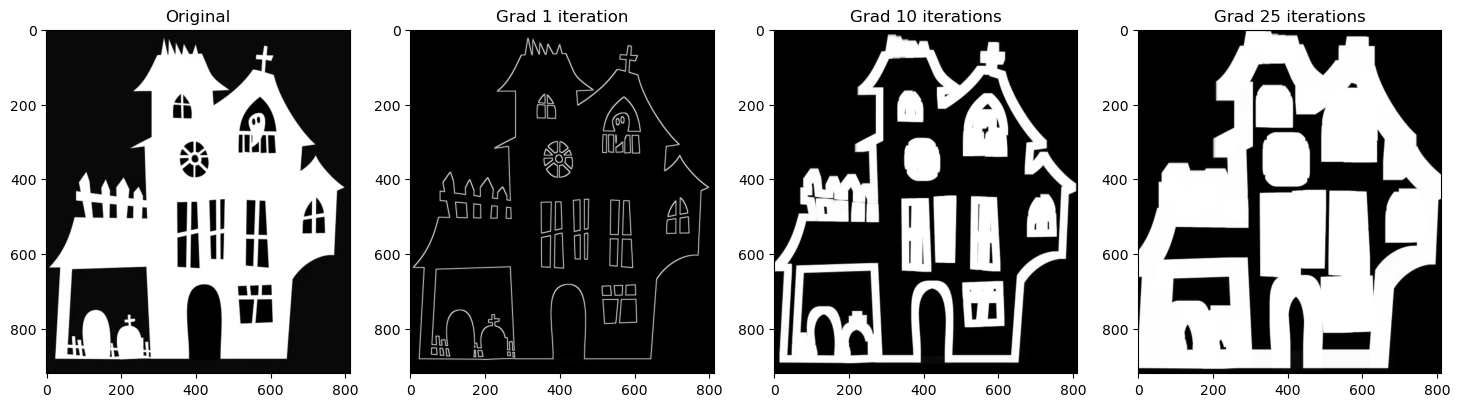

In [39]:
kernel = np.ones((3,3),np.uint8)

img_grad_1 = cv2.morphologyEx(house_img,cv2.MORPH_GRADIENT,kernel,iterations=1)
img_grad_10 = cv2.morphologyEx(house_img,cv2.MORPH_GRADIENT,kernel,iterations=10)
img_grad_25 = cv2.morphologyEx(house_img,cv2.MORPH_GRADIENT,kernel,iterations=25)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(141);plt.imshow(house_img, cmap="gray");  plt.title("Original")
plt.subplot(142);plt.imshow(img_grad_1, cmap="gray");  plt.title("Grad 1 iteration")
plt.subplot(143);plt.imshow(img_grad_10, cmap="gray");  plt.title("Grad 10 iterations")
plt.subplot(144);plt.imshow(img_grad_25, cmap="gray");  plt.title("Grad 25 iterations")

TopHat & BlackHat

TopHat is the difference between the original and the opened image
BlackHat is the difference between the original and the closed image

Text(0.5, 1.0, 'Black Hat')

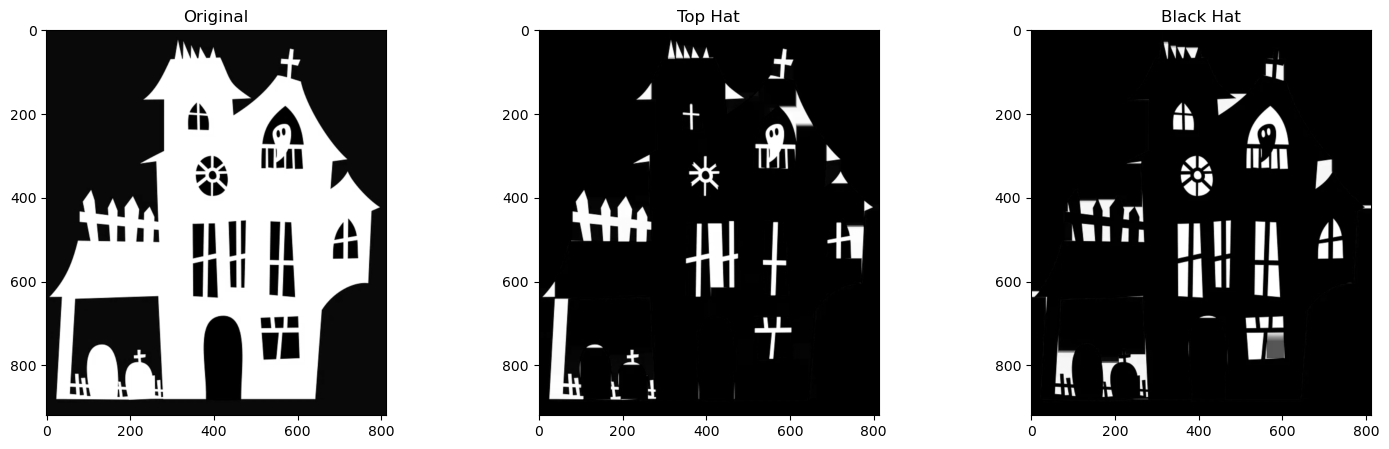

In [40]:
kernel = np.ones((5,5),np.uint8)
# Note, the kernel needs to be a lot larger or the number of iterations needs to be higher.  
# Otherwise the original and the morphed will be too similar

img_tophat = cv2.morphologyEx(house_img,cv2.MORPH_TOPHAT,kernel,iterations=10)
img_blackhat = cv2.morphologyEx(house_img,cv2.MORPH_BLACKHAT,kernel,iterations=10)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(131);plt.imshow(house_img, cmap="gray");  plt.title("Original")
plt.subplot(132);plt.imshow(img_tophat, cmap="gray");  plt.title("Top Hat")
plt.subplot(133);plt.imshow(img_blackhat, cmap="gray");  plt.title("Black Hat")